# Lab 2: Advertising Visualizations

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Lab


## 0. Load and visualize the data

In [52]:
# load data from your google drive using pandas
data = pd.read_csv('/content/drive/My Drive/Auto.csv')


# visualize the first 10 rows of the data table
data.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


Upon further investigation, it seemed that horsepower had values of type string instead of int.
1. I first checked that all values could be converted to int
  - one of the values was '?', so I changed value to 0 (because no actual models have 0 horsepower)
2. I converted the values to int's

In [53]:
type(data['horsepower'][0])

str

In [54]:
data['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [56]:
data.loc[data['horsepower'] == '?', 'horsepower'] = '0'
data.loc[data['horsepower'] == '0']

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,0,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,0,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,0,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,0,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,0,2320,15.8,81,2,renault 18i


In [57]:
data['horsepower'] = data['horsepower'].astype(int)
type(data['horsepower'][0])

numpy.int64

## 0b.Understand the dataset values

Analyze the dataset shape, means, distributions


In [58]:
#see size of dataset
print('data shape', data.shape)

#check if name features can be used as an index (if they are all unique values)
print('unique values in car names', data['name'].nunique())

data shape (397, 9)
unique values in car names 304


1. The dataset has 9 columns and 397 rows:
9 features and 397 samples

2. These are describing the features of a car and the name for the model corrsponding to the features. (I assume the label is name, so given a car's features you can guess the car model)

In [59]:
#first check the statistic info of the data
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,103.153652,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,39.986602,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,92.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


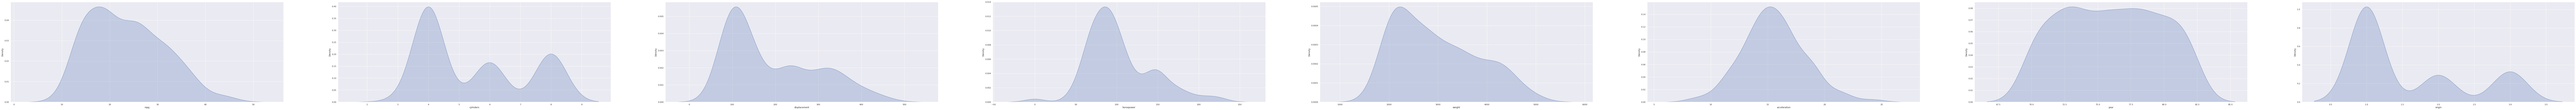

In [65]:
fig, axes = plt.subplots(1, len(data.columns)-1)

sns.set(rc={"figure.figsize":(250, 10)})

index = 0
for col in data.columns:
    sns.kdeplot(data=data[col], shade=True, ax = axes[index])
    index = index+1

    if(index == 8):
      break


Some of the features seem to follow a Guassian distribution while others do not.

## Find relationships between Features and Label

Visualize and Analyse the data to find what features are most related to the label

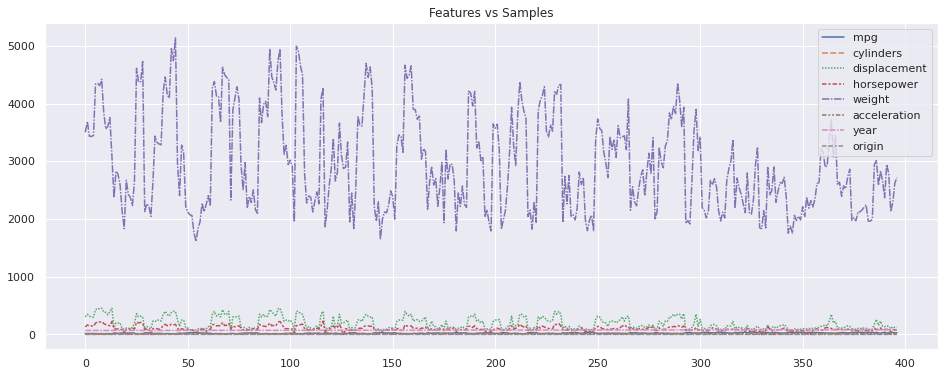

In [66]:
plt.figure(figsize=(16,6))
plt.title("Features vs Samples")

sns.lineplot(data = data)

As you can see, the size of the weight values are relatively larger than the other values. **But** its too hard to see correlation in this graph

In [68]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


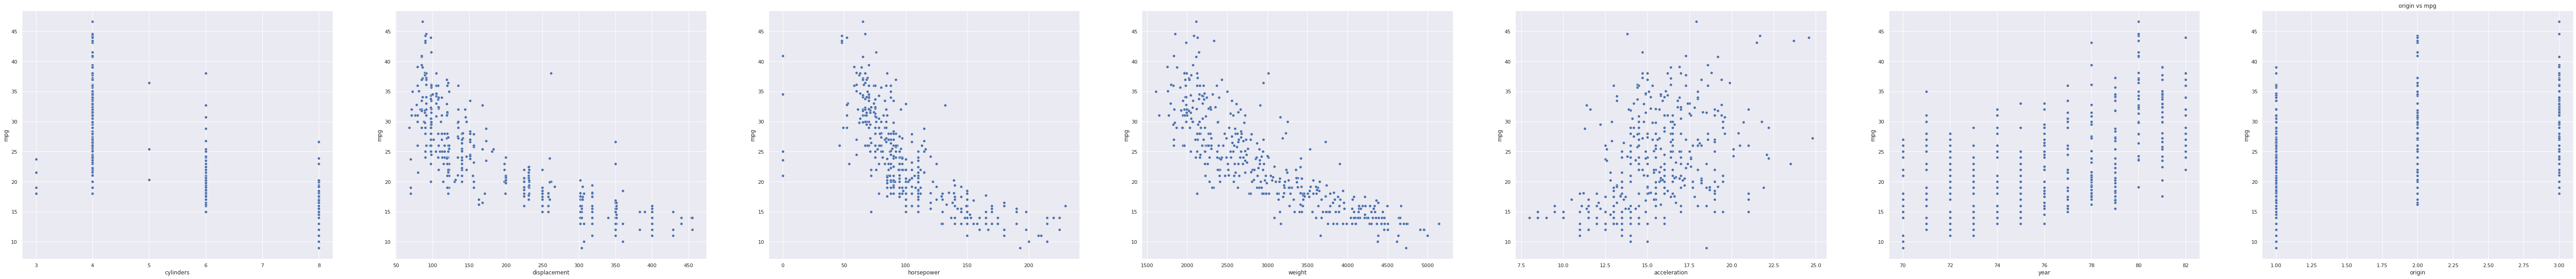

In [70]:
#plotting the different features with respect medv (which is house price)
fig, axes = plt.subplots(1, 7, figsize=(100, 10))

for index, col in enumerate(data.columns):
  if index==0:
    continue
  sns.scatterplot(x = data[col], y = data['mpg'], ax = axes[index-1])
  title = col + ' vs mpg'
  plt.title(title)
  plt.xlabel(col)
  index = index+1
  if(index == 8):
    break

As you can see, there are pretty good linear relationships between some features and mpg (negative correlations), and one weaker positive relationship

You can see the strength of this relationship **below** using a covariance matrix (to measure to covariance between Sales and the individual features).

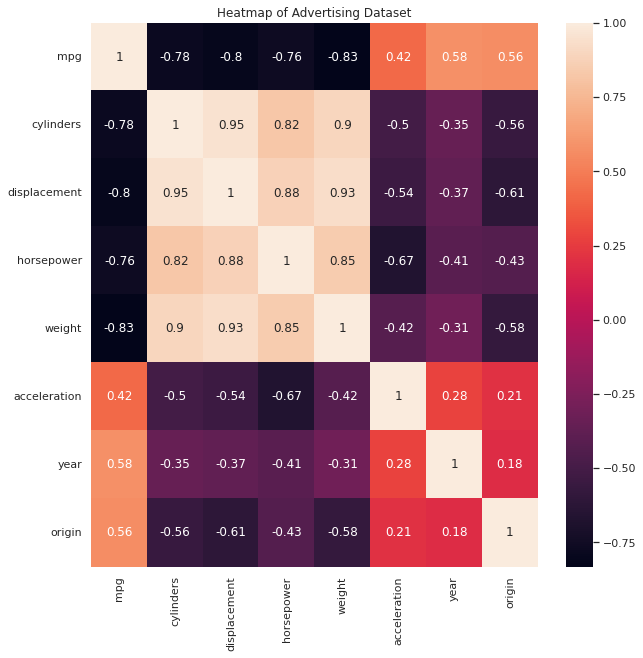

In [74]:
plt.figure(figsize=(10, 10))
plt.title('Heatmap of Advertising Dataset')
corr = data.corr()
sns.heatmap(data=corr, annot=True)

1. Here, you can see, there are a number of features (cylinders, displacement, horsepower, and weight) with stronger neagtive correlation to mpg.

2. The other features have weaker but still present positive correlation with mpg.

3. There is also strong correlation between features and other features.

## 1.Use single linear regression with respect to each of the predictors. 

Discuss your finding about which predictor(s) has(have) the strongest relation with the response.

Using the correlation matrix, I saw that there was a strong negative corelation between mpg and cylinders, displacement, horsepower, and weight.

- There was also a moderate correlaton between mpg and other features. 

- I'll test this hypothesis by using the linear regression fit with statsmodel

In [78]:
# show your code for one predictor's result here
line = smf.ols(formula='mpg ~ cylinders', data=data).fit()

# print the coefficients
line.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     598.9
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           3.67e-81
Time:                        19:58:49   Log-Likelihood:                -1196.4
No. Observations:                 397   AIC:                             2397.
Df Residuals:                     395   BIC:                             2405.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.0032      0.834     51.563      0.000      41.364      44.643
cylinders     -3.5701      0.146    -24.473      0.000      -3.857      -3.283
==============================================================================
Omnibus:                       38.686   Durbin-Watson:                   1.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.253
Skew:                           0.698   Prob(JB):                     2.73e-12
Kurtosis:                       4.126   Cond. No.                         19.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
# show your code for one predictor's result here
line = smf.ols(formula='mpg ~ displacement', data=data).fit()

# print the coefficients
line.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     724.4
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           2.25e-91
Time:                        19:59:17   Log-Likelihood:                -1172.8
No. Observations:                 397   AIC:                             2350.
Df Residuals:                     395   BIC:                             2358.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       35.1883      0.493     71.433      0.000      34.220      36.157
displacement    -0.0603      0.002    -26.914      0.000      -0.065      -0.056
==============================================================================
Omnibus:                       40.862   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.120
Skew:                           0.706   Prob(JB):                     1.45e-13
Kurtosis:                       4.257   Cond. No.                         464.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
# show your code for one predictor's result here
line = smf.ols(formula='mpg ~ horsepower', data=data).fit()

# print the coefficients
line.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     543.5
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           3.10e-76
Time:                        19:59:41   Log-Likelihood:                -1207.8
No. Observations:                 397   AIC:                             2420.
Df Residuals:                     395   BIC:                             2428.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.8792      0.707     55.019      0.000      37.490      40.268
horsepower    -0.1489      0.006    -23.314      0.000      -0.161      -0.136
==============================================================================
Omnibus:                       12.157   Durbin-Watson:                   0.995
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.244
Skew:                           0.323   Prob(JB):                     0.000807
Kurtosis:                       3.667   Cond. No.                         306.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
# show your code for one predictor's result here
line = smf.ols(formula='mpg ~ weight', data=data).fit()

# print the coefficients
line.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     886.6
Date:                Thu, 10 Feb 2022   Prob (F-statistic):          5.37e-103
Time:                        20:00:09   Log-Likelihood:                -1146.0
No. Observations:                 397   AIC:                             2296.
Df Residuals:                     395   BIC:                             2304.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.3174      0.796     58.166      0.000      44.752      47.883
weight        -0.0077      0.000    -29.776      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       40.133   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.057
Skew:                           0.712   Prob(JB):                     6.72e-13
Kurtosis:                       4.166   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
# show your code for one predictor's result here
line = smf.ols(formula='mpg ~ acceleration', data=data).fit()

# print the coefficients
line.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     85.73
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           1.33e-18
Time:                        20:00:54   Log-Likelihood:                -1340.6
No. Observations:                 397   AIC:                             2685.
Df Residuals:                     395   BIC:                             2693.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.8218      2.050      2.352      0.019       0.791       8.852
acceleration     1.2018      0.130      9.259      0.000       0.947       1.457
==============================================================================
Omnibus:                       17.047   Durbin-Watson:                   0.670
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.752
Skew:                           0.491   Prob(JB):                     0.000140
Kurtosis:                       2.672   Cond. No.                         91.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
# show your code for one predictor's result here
line = smf.ols(formula='mpg ~ year', data=data).fit()

# print the coefficients
line.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     201.8
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           2.77e-37
Time:                        20:01:05   Log-Likelihood:                -1297.7
No. Observations:                 397   AIC:                             2599.
Df Residuals:                     395   BIC:                             2607.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -70.2001      6.605    -10.628      0.000     -83.186     -57.214
year           1.2332      0.087     14.205      0.000       1.063       1.404
==============================================================================
Omnibus:                       22.297   Durbin-Watson:                   0.772
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.960
Skew:                           0.379   Prob(JB):                     0.000342
Kurtosis:                       2.376   Cond. No.                     1.57e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
# show your code for one predictor's result here
line = smf.ols(formula='mpg ~ origin', data=data).fit()

# print the coefficients
line.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     184.0
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           1.13e-34
Time:                        20:01:16   Log-Likelihood:                -1303.7
No. Observations:                 397   AIC:                             2611.
Df Residuals:                     395   BIC:                             2619.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.8623      0.716     20.760      0.000      13.455      16.270
origin         5.4967      0.405     13.564      0.000       4.700       6.293
==============================================================================
Omnibus:                       25.749   Durbin-Watson:                   0.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.291
Skew:                           0.663   Prob(JB):                     4.36e-07
Kurtosis:                       3.104   Cond. No.                         4.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using adjusted R-squared to measure the best fit line and correlation for the features, weight had the best linear regression fitted line and acceleration had the worst. 

## 2. Use all predictors for multiple linear regression. 

Discuss your finding about which predictor(s) has(have) the strongest relation with the response. 

1. First I try multiple linear regresson using all the features given

In [86]:
# show your code that involves all predictors for regression
line = smf.ols(formula='mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', data=data).fit()

# print the coefficients
line.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.0
Date:                Thu, 10 Feb 2022   Prob (F-statistic):          1.28e-141
Time:                        20:08:27   Log-Likelihood:                -1036.8
No. Observations:                 397   AIC:                             2090.
Df Residuals:                     389   BIC:                             2121.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.9640      4.449     -4.038      0.000     -26.712      -9.216
cylinders       -0.4636      0.322     -1.441      0.150      -1.096       0.169
displacement     0.0200      0.007      2.688      0.007       0.005       0.035
horsepower      -0.0149      0.011     -1.335      0.183      -0.037       0.007
weight          -0.0066      0.001    -10.544      0.000      -0.008      -0.005
acceleration     0.0939      0.091      1.027      0.305      -0.086       0.274
year             0.7574      0.050     15.083      0.000       0.659       0.856
origin           1.4457      0.277      5.218      0.000       0.901       1.990
==============================================================================
Omnibus:                       30.358   Durbin-Watson:                   1.298
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.913
Skew:                           0.513   Prob(JB):                     2.39e-11
Kurtosis:                       4.379   Cond. No.                     8.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

2. Then i tried using a combination of the strongest of the features

In [87]:
# show your code that involves all predictors for regression
line = smf.ols(formula='mpg ~ cylinders + displacement + horsepower + weight', data=data).fit()

# print the coefficients
line.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     234.4
Date:                Thu, 10 Feb 2022   Prob (F-statistic):          1.54e-102
Time:                        20:09:22   Log-Likelihood:                -1137.2
No. Observations:                 397   AIC:                             2284.
Df Residuals:                     392   BIC:                             2304.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       45.4739      1.507     30.167      0.000      42.510      48.437
cylinders       -0.3542      0.411     -0.863      0.389      -1.161       0.453
displacement    -0.0024      0.009     -0.274      0.784      -0.020       0.015
horsepower      -0.0342      0.011     -3.020      0.003      -0.057      -0.012
weight          -0.0054      0.001     -7.528      0.000      -0.007      -0.004
==============================================================================
Omnibus:                       37.647   Durbin-Watson:                   0.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.801
Skew:                           0.693   Prob(JB):                     9.30e-12
Kurtosis:                       4.073   Cond. No.                     2.21e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

3. Since this did worse, I tried adding all the features but took out only the least correlated feature (acceleration)

In [88]:
# show your code that involves all predictors for regression
line = smf.ols(formula='mpg ~ cylinders + displacement + horsepower + weight + year + origin', data=data).fit()

# print the coefficients
line.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     299.6
Date:                Thu, 10 Feb 2022   Prob (F-statistic):          1.19e-142
Time:                        20:10:18   Log-Likelihood:                -1037.3
No. Observations:                 397   AIC:                             2089.
Df Residuals:                     390   BIC:                             2117.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -16.2007      4.105     -3.947      0.000     -24.272      -8.130
cylinders       -0.4705      0.322     -1.463      0.144      -1.103       0.162
displacement     0.0187      0.007      2.550      0.011       0.004       0.033
horsepower      -0.0211      0.009     -2.227      0.027      -0.040      -0.002
weight          -0.0063      0.001    -11.161      0.000      -0.007      -0.005
year             0.7550      0.050     15.051      0.000       0.656       0.854
origin           1.4407      0.277      5.200      0.000       0.896       1.985
==============================================================================
Omnibus:                       34.703   Durbin-Watson:                   1.301
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.202
Skew:                           0.549   Prob(JB):                     8.46e-14
Kurtosis:                       4.560   Cond. No.                     7.61e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

4. For curiosity, I tried removing some of the features that were highly negatively correlated to see what would happen. The idea was that since these features are strongly correlated with each other anyway, they didnt add much to the model all together, and adding them into the model maybe even focused the mpg prediction only on those features

In [97]:
# show your code that involves all predictors for regression
line = smf.ols(formula='mpg ~ weight + acceleration + year + origin', data=data).fit()

# print the coefficients
line.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     442.3
Date:                Thu, 10 Feb 2022   Prob (F-statistic):          7.69e-144
Time:                        20:17:10   Log-Likelihood:                -1040.7
No. Observations:                 397   AIC:                             2091.
Df Residuals:                     392   BIC:                             2111.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -19.0294      4.024     -4.729      0.000     -26.941     -11.117
weight          -0.0059      0.000    -22.163      0.000      -0.006      -0.005
acceleration     0.0794      0.069      1.158      0.248      -0.055       0.214
year             0.7508      0.049     15.406      0.000       0.655       0.847
origin           1.1677      0.258      4.525      0.000       0.660       1.675
==============================================================================
Omnibus:                       34.087   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.513
Skew:                           0.544   Prob(JB):                     1.97e-13
Kurtosis:                       4.534   Cond. No.                     7.40e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

So, including all the features (with maybe the exception of acceleration) was best for the model.

## 3. Add interaction effects

In [98]:
# try with all possible Interaction combinations, which combination is significant to the response?
# show your code that involves all predictors for regression
line = smf.ols(formula='mpg ~ cylinders + displacement + horsepower + weight * acceleration + year * origin', data=data).fit()

# print the coefficients
line.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     233.7
Date:                Thu, 10 Feb 2022   Prob (F-statistic):          1.77e-150
Time:                        20:19:37   Log-Likelihood:                -1010.1
No. Observations:                 397   AIC:                             2040.
Df Residuals:                     387   BIC:                             2080.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -22.2440      9.600     -2.317      0.021     -41.119      -3.369
cylinders              -0.1893      0.305     -0.621      0.535      -0.788       0.410
displacement           -0.0006      0.007     -0.075      0.940      -0.015       0.014
horsepower             -0.0251      0.011     -2.346      0.019      -0.046      -0.004
weight                  0.0030      0.002      1.949      0.052   -2.68e-05       0.006
acceleration            1.5803      0.240      6.586      0.000       1.109       2.052
weight:acceleration    -0.0005   8.19e-05     -6.588      0.000      -0.001      -0.000
year                    0.5132      0.107      4.811      0.000       0.303       0.723
origin                -12.1224      4.456     -2.721      0.007     -20.883      -3.362
year:origin             0.1695      0.057      2.961      0.003       0.057       0.282
==============================================================================
Omnibus:                       25.119   Durbin-Watson:                   1.418
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.143
Skew:                           0.476   Prob(JB):                     1.42e-08
Kurtosis:                       4.131   Cond. No.                     3.08e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.08e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
# try with all possible Interaction combinations, which combination is significant to the response?

# show your code that involves all predictors for regression
line = smf.ols('mpg ~ acceleration + horsepower + year * horsepower * acceleration + weight + origin ', data=data).fit()
line.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     266.8
Date:                Thu, 10 Feb 2022   Prob (F-statistic):          5.97e-160
Time:                        20:21:12   Log-Likelihood:                -987.62
No. Observations:                 397   AIC:                             1995.
Df Residuals:                     387   BIC:                             2035.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       97.3362     48.133      2.022      0.044       2.702     191.971
acceleration                   -11.4162      2.935     -3.890      0.000     -17.186      -5.646
horsepower                      -1.1965      0.412     -2.903      0.004      -2.007      -0.386
year                            -0.9169      0.638     -1.438      0.151      -2.171       0.337
year:horsepower                  0.0173      0.006      3.072      0.002       0.006       0.028
year:acceleration                0.1623      0.039      4.151      0.000       0.085       0.239
horsepower:acceleration          0.1213      0.028      4.322      0.000       0.066       0.177
year:horsepower:acceleration    -0.0017      0.000     -4.537      0.000      -0.002      -0.001
weight                          -0.0054      0.000    -13.356      0.000      -0.006      -0.005
origin                           0.9066      0.234      3.876      0.000       0.447       1.366
==============================================================================
Omnibus:                       19.902   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.200
Skew:                           0.285   Prob(JB):                     5.07e-09
Kurtosis:                       4.409   Cond. No.                     3.92e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.92e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
# show your code that involves all predictors for regression
line = smf.ols(formula='mpg ~ cylinders * displacement * horsepower * weight + acceleration * year * origin', data=data).fit()

# print the coefficients
line.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     129.5
Date:                Thu, 10 Feb 2022   Prob (F-statistic):          6.79e-160
Time:                        20:20:26   Log-Likelihood:                -952.08
No. Observations:                 397   AIC:                             1950.
Df Residuals:                     374   BIC:                             2042.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                  130.7053     65.391      1.999      0.046       2.125     259.285
cylinders                                    8.2708      9.173      0.902      0.368      -9.767      26.308
displacement                                -0.3480      0.381     -0.913      0.362      -1.098       0.402
cylinders:displacement                       0.0211      0.052      0.406      0.685      -0.081       0.123
horsepower                                   0.1887      0.474      0.398      0.691      -0.743       1.120
cylinders:horsepower                        -0.0816      0.081     -1.008      0.314      -0.241       0.078
displacement:horsepower                      0.0046      0.004      1.130      0.259      -0.003       0.013
cylinders:displacement:horsepower           -0.0004      0.001     -0.831      0.406      -0.001       0.001
weight                                       0.0091      0.017      0.538      0.591      -0.024       0.043
cylinders:weight                            -0.0032      0.003     -1.064      0.288      -0.009       0.003
displacement:weight                       2.977e-05      0.000      0.248      0.805      -0.000       0.000
cylinders:displacement:weight             1.265e-06   1.62e-05      0.078      0.938   -3.06e-05    3.31e-05
horsepower:weight                           -0.0002      0.000     -1.169      0.243      -0.001       0.000
cylinders:horsepower:weight               3.725e-05   2.65e-05      1.407      0.160   -1.48e-05    8.93e-05
displacement:horsepower:weight           -5.046e-07   1.27e-06     -0.398      0.691   -2.99e-06    1.99e-06
cylinders:displacement:horsepower:weight  3.173e-08   1.64e-07      0.193      0.847   -2.91e-07    3.54e-07
acceleration                                -9.5947      2.978     -3.222      0.001     -15.451      -3.739
year                                        -1.2837      0.607     -2.116      0.035      -2.477      -0.091
acceleration:year                            0.1198      0.039      3.087      0.002       0.043       0.196
origin                                     -41.9925     28.080     -1.495      0.136     -97.206      13.221
acceleration:origin                          2.1322      1.760      1.212      0.226      -1.328       5.593
year:origin                                  0.4944      0.364      1.359      0.175      -0.221       1.210
acceleration:year:origin                    -0.0241      0.023     -1.058      0.291      -0.069       0.021
==============================================================================
Omnibus:                       56.474   Durbin-Watson:                   1.642
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.267
Skew:       

It seems that multiplying the similar features (ones which were correlated) worked best for the model

## 4. Explore non-linear effects of predictors. e.g. polynomial

1. I tried checking individual features in non-linear ways before adding them into my multiple linear combo model

In [121]:
# show your code that involves all predictors for regression
line = smf.ols(formula='mpg ~ np.power(acceleration,2)', data=data).fit()

# print the coefficients
line.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     76.30
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           6.99e-17
Time:                        20:29:52   Log-Likelihood:                -1344.6
No. Observations:                 397   AIC:                             2693.
Df Residuals:                     395   BIC:                             2701.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    14.6307      1.079     13.559      0.000      12.509      16.752
np.power(acceleration, 2)     0.0356      0.004      8.735      0.000       0.028       0.044
==============================================================================
Omnibus:                       17.961   Durbin-Watson:                   0.659
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.343
Skew:                           0.493   Prob(JB):                     0.000104
Kurtosis:                       2.628   Cond. No.                         793.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
# show your code that involves all predictors for regression
line = smf.ols(formula='mpg ~ np.log(weight)', data=data).fit()

# print the coefficients
line.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     978.1
Date:                Thu, 10 Feb 2022   Prob (F-statistic):          6.42e-109
Time:                        20:33:58   Log-Likelihood:                -1132.3
No. Observations:                 397   AIC:                             2269.
Df Residuals:                     395   BIC:                             2277.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     210.5391      5.984     35.185      0.000     198.775     222.303
np.log(np.power(weight, 3))    -7.8350      0.251    -31.275      0.000      -8.328      -7.342
==============================================================================
Omnibus:                       49.914   Durbin-Watson:                   0.776
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.420
Skew:                           0.778   Prob(JB):                     2.09e-18
Kurtosis:                       4.581   Cond. No.                         679.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [139]:
# show your code that involves all predictors for regression
line = smf.ols(formula='mpg ~ cylinders * displacement * horsepower + np.log(weight) + acceleration * year * origin', data=data).fit()

# print the coefficients
line.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     179.4
Date:                Thu, 10 Feb 2022   Prob (F-statistic):          3.44e-162
Time:                        20:35:12   Log-Likelihood:                -965.28
No. Observations:                 397   AIC:                             1963.
Df Residuals:                     381   BIC:                             2026.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                           208.9632     46.550      4.489      0.000     117.436     300.490
cylinders                            -1.6348      1.428     -1.144      0.253      -4.444       1.174
displacement                         -0.1300      0.059     -2.189      0.029      -0.247      -0.013
cylinders:displacement                0.0138      0.008      1.793      0.074      -0.001       0.029
horsepower                           -0.1611      0.078     -2.067      0.039      -0.314      -0.008
cylinders:horsepower                  0.0117      0.013      0.929      0.354      -0.013       0.036
displacement:horsepower               0.0011      0.001      1.815      0.070   -8.72e-05       0.002
cylinders:displacement:horsepower    -0.0001   7.31e-05     -1.552      0.121      -0.000    3.03e-05
np.log(weight)                      -14.3597      1.856     -7.736      0.000     -18.009     -10.710
acceleration                         -6.0486      2.869     -2.108      0.036     -11.690      -0.407
year                                 -0.5880      0.590     -0.996      0.320      -1.749       0.573
acceleration:year                     0.0736      0.038      1.962      0.050      -0.000       0.147
origin                              -17.4316     27.915     -0.624      0.533     -72.318      37.455
acceleration:origin                   0.5096      1.743      0.292      0.770      -2.917       3.937
year:origin                           0.1736      0.362      0.479      0.632      -0.539       0.886
acceleration:year:origin             -0.0030      0.023     -0.131      0.896      -0.047       0.042
==============================================================================
Omnibus:                       52.802   Durbin-Watson:                   1.652
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.303
Skew:                           0.674   Prob(JB):                     3.75e-28
Kurtosis:                       5.412   Cond. No.                     9.31e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.31e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [141]:
# show your code that involves all predictors for regression
line = smf.ols(formula='mpg ~ cylinders * displacement * horsepower * weight + np.power(acceleration,2) * year * origin', data=data).fit()

# print the coefficients
line.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     131.4
Date:                Thu, 10 Feb 2022   Prob (F-statistic):          6.11e-161
Time:                        20:35:58   Log-Likelihood:                -949.51
No. Observations:                 397   AIC:                             1945.
Df Residuals:                     374   BIC:                             2037.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   65.2562     53.436      1.221      0.223     -39.817     170.329
cylinders                                    7.2694      9.115      0.797      0.426     -10.654      25.193
displacement                                -0.2824      0.380     -0.744      0.458      -1.029       0.464
cylinders:displacement                       0.0139      0.052      0.269      0.788      -0.088       0.115
horsepower                                   0.1714      0.471      0.364      0.716      -0.754       1.097
cylinders:horsepower                        -0.0733      0.080     -0.913      0.362      -0.231       0.085
displacement:horsepower                      0.0039      0.004      0.959      0.338      -0.004       0.012
cylinders:displacement:horsepower           -0.0004      0.001     -0.684      0.494      -0.001       0.001
weight                                       0.0066      0.017      0.390      0.697      -0.027       0.040
cylinders:weight                            -0.0027      0.003     -0.905      0.366      -0.009       0.003
displacement:weight                       1.973e-05      0.000      0.165      0.869      -0.000       0.000
cylinders:displacement:weight             2.199e-06   1.61e-05      0.137      0.891   -2.94e-05    3.38e-05
horsepower:weight                           -0.0002      0.000     -1.053      0.293      -0.001       0.000
cylinders:horsepower:weight               3.294e-05   2.63e-05      1.253      0.211   -1.87e-05    8.46e-05
displacement:horsepower:weight            -3.81e-07   1.26e-06     -0.302      0.763   -2.86e-06     2.1e-06
cylinders:displacement:horsepower:weight  1.946e-08   1.63e-07      0.119      0.905   -3.02e-07     3.4e-07
np.power(acceleration, 2)                   -0.3247      0.097     -3.348      0.001      -0.515      -0.134
year                                        -0.4335      0.322     -1.345      0.179      -1.067       0.200
np.power(acceleration, 2):year               0.0041      0.001      3.221      0.001       0.002       0.007
origin                                     -26.9255     14.427     -1.866      0.063     -55.294       1.443
np.power(acceleration, 2):origin             0.0729      0.055      1.331      0.184      -0.035       0.181
year:origin                                  0.3260      0.187      1.745      0.082      -0.041       0.693
np.power(acceleration, 2):year:origin       -0.0008      0.001     -1.172      0.242      -0.002       0.001
==============================================================================
Omnibus:                       56.787   Durbin-Watson:                   1.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.239
Skew:       